# Priority Queues

## Agenda

1. Motives
2. Naive implementation
2. Heaps
    - Mechanics
    - Implementation
    - Run-time Analysis
3. Heapsort

## 1. Motives

## 2. Naive implementation

In [1]:
class PriorityQueue:
    def __init__(self, key=lambda x:x):
        self.data = []
        self.key = key
        
    def add(self, x):
        self.data.append(x)
        self.data.sort(key=self.key)
    
    def max(self):
        return self.data[-1]

    def pop_max(self):
        return self.data.pop()
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
pq = PriorityQueue()

In [3]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

In [4]:
pq

[3, 15, 27, 55, 56, 58, 62, 75, 82, 97]

In [5]:
while pq:
    print(pq.pop_max())

97
82
75
62
58
56
55
27
15
3


## 3. Heaps

### Mechanics

### Implementation

In [39]:
class Heap:
    def __init__(self):
        self.data = []
    @staticmethod
    def _parent(idx):
        return (idx-1)//2
    
    @staticmethod
    def _left(idx):
        return 2*idx+1

    @staticmethod
    def _right(idx):
        return 2*idx+2
    

    def add(self, x): ### O(log N)
        self.data.append(x)
        idx = len(self.data)-1
        pidx = Heap._parent(idx)
        while idx != 0 and self.data[pidx]<x:
            self.data[idx], self.data[pidx] = self.data[pidx], self.data[idx]
            idx = pidx
            pidx = Heap._parent(idx)
        
    def max(self):
        assert(len(self)>0)
        return self.data[0]
    
    def heapify(self): ### O(log N)
        idx = 0
        while True:
            lidx = Heap._left(idx)
            ridx = Heap._right(idx)
            maxidx = idx
            if lidx < len(self.data) and self.data[idx] < self.data[lidx]: 
                maxidx = lidx
            if ridx < len(self.data) and self.data[maxidx] < self.data[ridx]:
                maxidx = ridx
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break
    
    def pop_max(self): ### O(log N)
        assert(len(self.data)>0)
        ret = self.data[0]
        if len(self.data) > 1:
            self.data[0] = self.data[-1]
            del self.data[-1]
            self.heapify()
        else: 
            del self.data[-1]
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [40]:
h = Heap()

In [41]:
import random
for _ in range(10):
    h.add(random.randrange(100))

In [42]:
h

[85, 82, 37, 67, 64, 11, 36, 4, 44, 10]

In [43]:
while h:
    print(h.pop_max())

85
82
67
64
44
37
36
11
10
4


### Run-time Analysis

## 4. Heapsort

In [50]:
def heapsort(iterable): ## O(N*log N)
    heap = Heap()
    for x in iterable:
        heap.add(x)
    sorted_lst = []
    while heap:
        sorted_lst.append(heap.pop_max())
    sorted_lst.reverse()
    return sorted_lst

In [51]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    while True:
        b = next(it)
        yield a,b
        a = b

lst = heapsort(random.random() for _ in range(1000))
all((a <= b) for a, b in pairs(lst))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: generator 'pairs' raised StopIteration


True

In [52]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                         'from __main__ import heapsort; '
                         'import random; '
                         'rlst = (random.random() for _ in range({}))'.format(n),
                         number=1000)

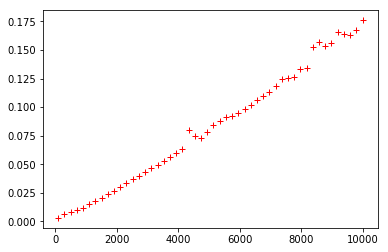

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

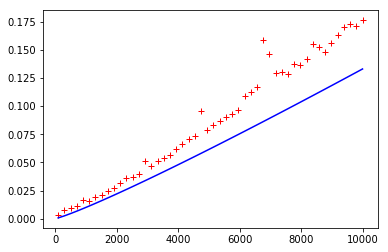

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()